In [1]:
import numpy as np
import pandas as pd
import re
import plotly.express as px
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_excel('../.data/dataset.xlsx')

In [3]:
data.head()

,Text,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       33000 non-null  object
 1   Sentiment  33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


## Data Cleaning

In [5]:
df = data.copy()

In [6]:
def clean_text(text):
    # Remove special characters
    text = text.replace('Ã¯Â¿Â½', '')
    
    # Lower casing
    text = text.lower()
    
    # Remove mentions and links
    text = re.sub(r'@[^\s]+', '', text)
    text = re.sub(r'http\S+|bit.ly\S+', '', text)

    return text

In [7]:
sample_text = "This statement is to    Check the Clean_Text function. A link https://whhgs.com and taken from @twitter"
print(f"Cleaned Text: {clean_text(sample_text)}")

Cleaned Text: this statement is to    check the clean_text function. a link  and taken from 


In [8]:
cleaned_data = df.copy()
cleaned_data['Text'] = cleaned_data['Text'].apply(clean_text)

In [9]:
cleaned_data.head()

,Text,Sentiment
0,the geosolutions technology will leverage bene...,positive
1,"$esi on lows, down $1.50 to $2.50 bk a real po...",negative
2,"for the last quarter of 2010 , componenta 's n...",positive
3,according to the finnish-russian chamber of co...,neutral
4,the swedish buyout firm has sold its remaining...,neutral


## Data Preprocessing

In [10]:
df = cleaned_data.copy()

In [11]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [12]:
def preprocess_text(text):
    # Remove punctuations
    text = re.sub(r"""[!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~]""", '', text)

    # Remove numbers
    text = re.sub(r'([0-9]+)', '', text)

    # Remove more than one space
    text = re.sub(r' +', ' ', text)
    # Trim the text
    text = text.strip()

    # Remove stopwords and tokenize then join
    text = [token for token in word_tokenize(text) if token not in stop_words]
    text = ' '.join(text)

    return text

In [13]:
sample_text = df['Text'][2]
sample_text

"for the last quarter of 2010 , componenta 's net sales doubled to eur131m from eur76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of eur7m ."

In [14]:
preprocess_text(sample_text)

'last quarter componenta net sales doubled eurm eurm period year earlier moved zero pretax profit pretax loss eurm'

In [15]:
preprocessed_data = df.copy()
preprocessed_data['Text'] = preprocessed_data['Text'].apply(preprocess_text)

In [16]:
preprocessed_data.head()

,Text,Sentiment
0,geosolutions technology leverage benefon gps s...,positive
1,esi lows bk real possibility,negative
2,last quarter componenta net sales doubled eurm...,positive
3,according finnishrussian chamber commerce majo...,neutral
4,swedish buyout firm sold remaining percent sta...,neutral


## Feature Engineering

In [17]:
df = preprocessed_data.copy()

In [18]:
vectorizer = HashingVectorizer(n_features=12000)
vectorizer.fit(df['Text'])

HashingVectorizer(n_features=12000)

In [19]:
features = vectorizer.transform(df['Text'])
labels = df['Sentiment'].replace({"negative": -1, "neutral": 0, "positive": 1})

In [20]:
features.shape, labels.shape

((33000, 12000), (33000,))

In [21]:
features[0, :]

<1x12000 sparse matrix of type '<class 'numpy.float64'>'
	with 19 stored elements in Compressed Sparse Row format>

In [22]:
labels[0]

1

In [23]:
scaler = StandardScaler(with_mean=False)

In [24]:
scaled_features = scaler.fit_transform(features)

## Model

In [25]:
def train_model(model, x, y):
    model.fit(x, y)

    preds = model.predict(x)

    print(f"Accuracy of the model: {accuracy_score(y, preds)}")

    print(f"Classification Report for the model: \n{classification_report(y, preds)}")

    cm = confusion_matrix(y, preds, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

    disp.plot()
    
    return model

**SGDClassifier**

In [26]:
sgd = SGDClassifier()

Accuracy of the model: 0.8552121212121212
Classification Report for the model: 
              precision    recall  f1-score   support

          -1       0.84      0.83      0.84      8564
           0       0.85      0.85      0.85     14104
           1       0.87      0.88      0.88     10332

    accuracy                           0.86     33000
   macro avg       0.86      0.85      0.86     33000
weighted avg       0.86      0.86      0.86     33000



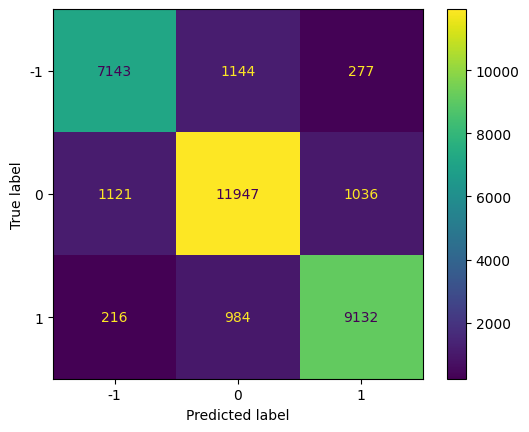

In [27]:
sgd = train_model(sgd, scaled_features, labels)

**Logistic Regression**

In [28]:
log = LogisticRegression(max_iter=1000)

Accuracy of the model: 0.7513939393939394
Classification Report for the model: 
              precision    recall  f1-score   support

          -1       0.80      0.63      0.71      8564
           0       0.70      0.84      0.76     14104
           1       0.82      0.73      0.77     10332

    accuracy                           0.75     33000
   macro avg       0.77      0.73      0.75     33000
weighted avg       0.76      0.75      0.75     33000



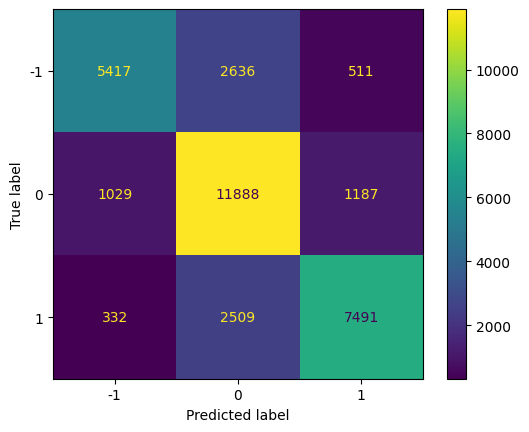

In [29]:
log = train_model(log, features, labels)

**GaussianNB**

In [30]:
naive = GaussianNB()

Accuracy of the model: 0.4663939393939394
Classification Report for the model: 
              precision    recall  f1-score   support

          -1       0.36      1.00      0.53      8564
           0       1.00      0.19      0.32     14104
           1       0.63      0.41      0.49     10332

    accuracy                           0.47     33000
   macro avg       0.66      0.53      0.45     33000
weighted avg       0.72      0.47      0.43     33000



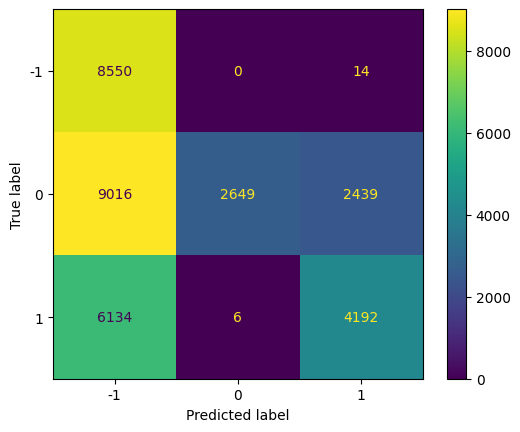

In [31]:
naive = train_model(naive, scaled_features.toarray(), labels)

**DecisionTreeClassifier**

Accuracy of the model: 0.981909090909091
Classification Report for the model: 
              precision    recall  f1-score   support

          -1       0.94      1.00      0.97      8564
           0       1.00      0.96      0.98     14104
           1       1.00      1.00      1.00     10332

    accuracy                           0.98     33000
   macro avg       0.98      0.99      0.98     33000
weighted avg       0.98      0.98      0.98     33000



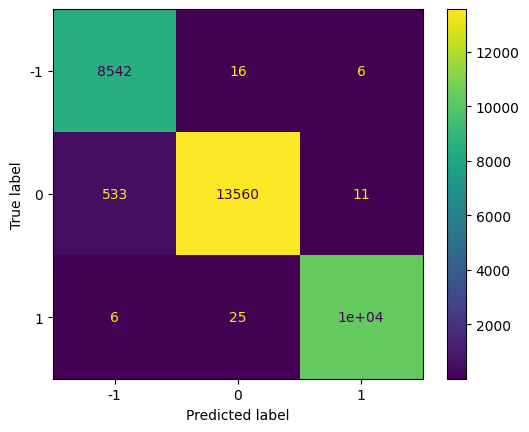

In [32]:
tree = DecisionTreeClassifier()
tree = train_model(tree, scaled_features, labels)

*So far We have seen that Decision Tree perform well on the dataset but it os overfitted. So to generalize well on the dataset, we will use GridSearch with different values of parameters in Decision Tree Classifier.*

In [38]:
params = {
    'criterion': ['gini', 'entropy', 'log_loss'], 
    'max_depth': list(range(25, 32)), 
    'max_features': ['sqrt', 'log2', None]
}

tree = DecisionTreeClassifier()

grid = GridSearchCV(tree, params, scoring='accuracy')

In [39]:
grid.fit(scaled_features, labels)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [25, 26, 27, 28, 29, 30, 31],
                         'max_features': ['sqrt', 'log2', None]},
             scoring='accuracy')

In [40]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.317233,0.068385,0.003938,0.000838,gini,25,sqrt,"{'criterion': 'gini', 'max_depth': 25, 'max_fe...",0.446515,0.466818,0.463939,0.491364,0.486970,0.471121,0.016349,39
1,0.217831,0.093922,0.003559,0.001167,gini,25,log2,"{'criterion': 'gini', 'max_depth': 25, 'max_fe...",0.426667,0.439091,0.440606,0.425909,0.434091,0.433273,0.006102,58
2,3.082565,0.194494,0.003800,0.001013,gini,25,None,"{'criterion': 'gini', 'max_depth': 25, 'max_fe...",0.492424,0.609545,0.611061,0.599697,0.620303,0.586606,0.047542,18
3,0.331423,0.049439,0.003614,0.000816,gini,26,sqrt,"{'criterion': 'gini', 'max_depth': 26, 'max_fe...",0.455455,0.515303,0.535303,0.488788,0.478333,0.494636,0.027986,24
4,0.235857,0.084088,0.003190,0.001468,gini,26,log2,"{'criterion': 'gini', 'max_depth': 26, 'max_fe...",0.430303,0.433939,0.429545,0.460909,0.433182,0.437576,0.011784,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.233353,0.091162,0.002933,0.000670,log_loss,30,log2,"{'criterion': 'log_loss', 'max_depth': 30, 'ma...",0.427273,0.436818,0.434848,0.441515,0.461818,0.440455,0.011627,45
59,4.235793,0.207083,0.003897,0.000983,log_loss,30,None,"{'criterion': 'log_loss', 'max_depth': 30, 'ma...",0.493485,0.610909,0.614242,0.605606,0.614545,0.587758,0.047246,11
60,0.453532,0.114480,0.003525,0.000689,log_loss,31,sqrt,"{'criterion': 'log_loss', 'max_depth': 31, 'ma...",0.445758,0.494091,0.521818,0.469394,0.476970,0.481606,0.025411,33
61,0.342603,0.163134,0.003608,0.001019,log_loss,31,log2,"{'criterion': 'log_loss', 'max_depth': 31, 'ma...",0.429697,0.456818,0.425606,0.441212,0.433182,0.437303,0.011025,51


In [41]:
model = grid.best_estimator_

## Model Save

In [43]:
import joblib

joblib.dump(vectorizer, '../model/vectorizer.joblib')
joblib.dump(scaler, '../model/scaler.joblib')
joblib.dump(model, '../model/model.joblib')

['../model/model.joblib']

## Model Evaluation

In [44]:
test = pd.read_excel('../.data/test-texts.xlsx')
answers = pd.read_excel('../.data/test-sentiments.xlsx')

In [48]:
test['Text'] = test['Text'].apply(clean_text)
test['Text'] = test['Text'].apply(preprocess_text)

vectorizer = joblib.load('../model/vectorizer.joblib')
features = vectorizer.transform(test['Text'])

scaler = joblib.load('../model/scaler.joblib')
scaled_features = scaler.transform(features)

answers = answers['Sentiments'].replace({"negative": -1, "neutral": 0, "positive": 1})

Accuracy of the model: 0.6273291925465838
Classification Report for the model: 
              precision    recall  f1-score   support

          -1       0.65      0.29      0.40        77
           0       0.57      0.87      0.69       143
           1       0.81      0.55      0.65       102

    accuracy                           0.63       322
   macro avg       0.67      0.57      0.58       322
weighted avg       0.66      0.63      0.61       322



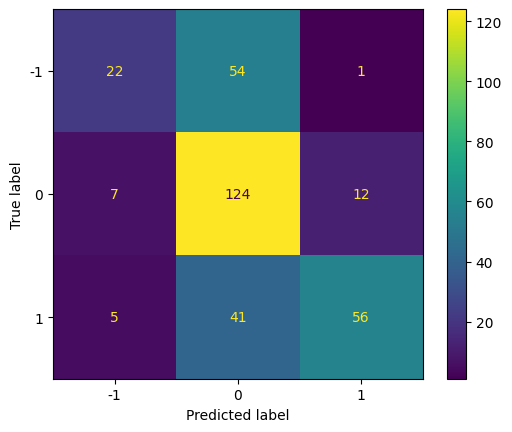

In [50]:
model = joblib.load('../model/model.joblib')
preds = model.predict(scaled_features)

print(f"Accuracy of the model: {accuracy_score(answers, preds)}")

print(f"Classification Report for the model: \n{classification_report(answers, preds)}")

cm = confusion_matrix(answers, preds, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot()